<a href="https://www.kaggle.com/code/chakrabortyarnab/getting-started-with-convnets?scriptVersionId=119509396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Image Classification using CNN
### Deep Learning
Deep learning is inspired by the functionality of human brain cells called artificial neural network. Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data.

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data. Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning.

Practical examples of deep learning are Virtual assistants, vision for driverless cars, money laundering, face recognition and many more.

### Convolutional Neural Network
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

CNN is a supervised type of Deep learning, most preferable used in image recognition and computer vision. Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables.

A convolution in CNN is nothing but a element wise multiplication i.e. dot product of the image matrix and the filter.

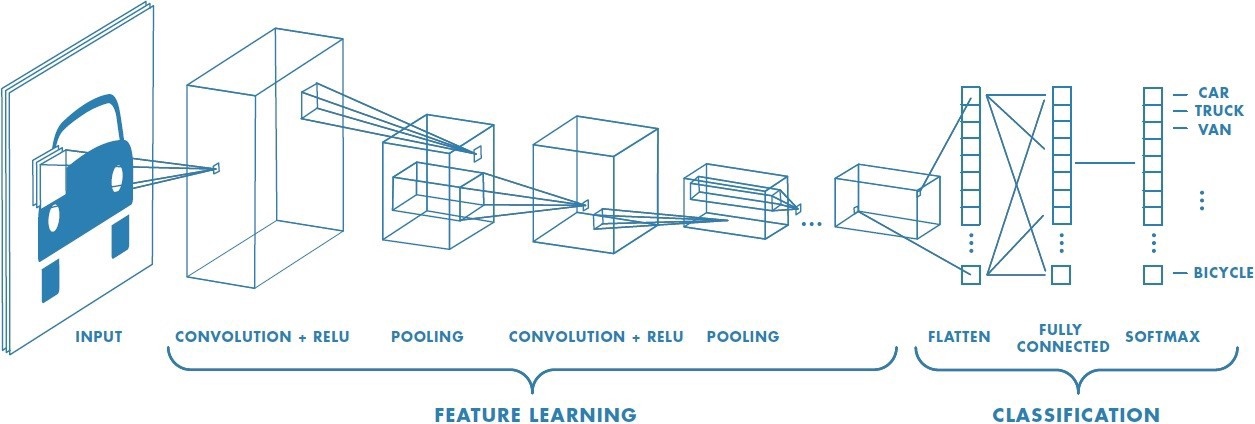

The image above shows us the various layers in a CNN. A convolution operation takes place between the image and the filter and the convolved feature is generated. Each filter in a CNN, learns different characteristic of an image.

The input image is processed in the first convolutional layer using the filter-weights. This results in new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased.

These smaller images are then processed in the second convolutional layer. We need filter-weights for each of these channels, and we need filter-weights for each output channel of this layer. 

The output of the second convolutional layer are then flattened to a single vector of length, which is used as the input to a fully-connected layer. This feeds into another fully-connected layer with neurons-one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

### Installing Keras
Keras is a high-level neural network API, written in Python which runs on top of either Tensorflow or Theano. You can install Keras from [here](http://keras.io/#installation).

Keras was written to simplify the construction of neural nets, as tensorflow’s API is very verbose. Keras makes everything very easy and you will see it in action below.

In [ ]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam
from keras.utils import np_utils
import keras
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import warnings; 
warnings.simplefilter('ignore')

# Problem Statement
Our goal is to construct and train an artificial neural network on thousands of MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

We will use the Keras Python API with TensorFlow as the backend.

In [ ]:
#reading the dataset
df=pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

In [ ]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)

In [ ]:
no_of_fonts=df['names'].nunique()
print('Number of different fonts are',no_of_fonts)

# Data Pre-processing

In [ ]:
#defining the class column and removing other unneccesary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20, 10))
for i in range(50):  
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
# Encoding the Target Label
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train=enc.fit_transform(y_train.values.reshape(-1,1))
y_test=  enc.transform(y_test.values.reshape(-1,1))

### Reshaping of images
The shape of X_train is (205569 , 28, 28, 1). As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).

Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.

In [ ]:
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Layers in CNN
#### Convolutional Layer + ReLU

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

The ReLU correction layer replaces all negative values received as inputs by zeros. It acts as an activation function.

#### Pooling layer.

Pooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

In Max Pooling, the largest element is taken from feature map. Average Pooling calculates the average of the elements in a predefined sized Image section. The total sum of the elements in the predefined section is computed in Sum Pooling. The Pooling Layer usually serves as a bridge between the Convolutional Layer and the FC Layer.


#### Fully Connected layers 

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Fully Connected Layers (i.e. Dense layers).

The flattened vector then undergoes few more FC layers where the mathematical functions operations usually take place. These layers give the ability to classify the features learned by the CNN. These layers in CNN reduce the human supervision

#### Dropout

Overfitting occurs when a particular model works so well on the training data causing a negative impact in the model’s performance when used on a new data.

To overcome this problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model. On passing a dropout of 0.3, 30% of the nodes are dropped out randomly from the neural network.

Dropout results in improving the performance of a machine learning model as it prevents overfitting by making the network simpler. It drops neurons from the neural networks during training.

#### Activation Layer

There are several commonly used activation functions such as the ReLU, Softmax, tanH and the Sigmoid functions. Each of these functions have a specific usage. For a binary classification CNN model, sigmoid and softmax functions are preferred an for a multi-class classification, generally softmax us used. 

In simple terms, activation functions in a CNN model determine whether a neuron should be activated or not. It decides whether the input to the work is important or not to predict using mathematical operations.

In [ ]:
batch_size = 128
img_rows, img_cols = 28, 28         # input image dimensions
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.25               # drop probability for dropout @ conv layer
prob_drop_hidden = 0.25             # drop probability for dropout @ fc layer

# Define CNN Model Architecure
The model will consist of **3 Concolutional Layers** and **2 Fully Connected Layers**
* Activation Function in Convolutional Layers: **ReLU**

    Activation function calculates a “weighted sum” of its input, adds a bias and then decides whether it should be “fired” or not. ReLU(Rectified Linear Unit) - A(x) = max(0,x). ReLu is nonlinear in nature
* Activation function in Output Layer: **Softmax** 

    The softmax function squashes the outputs of each unit to be between 0 and 1. It also divides each output such that the total sum of the outputs is equal to 1. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.
* Loss function: **Categorical Cross-entropy**
    
    The Loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. 
    
    Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.
* Optimizer: **Adam**
    
    The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
   
   Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.

In [ ]:
# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(64, (5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Convolution2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))
model.add(Flatten())

# fc1 layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, shuffle=True, verbose=1)

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)

plt.title('Accuracy vs Epochs')
plt.plot(epochs,history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

# Summary
* We Explored and performed pre-processing on the TMNIST data.
* We defined and complied a simple CNN model.
* We trained our model and got an accuracy of 93.63% on the validation set.

If you found this notebook helpful or you just liked it , some **upvotes** would be very much appreciated

# License
### References

* https://keras.io/
* https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter

Copyright (c) 2022 chakraborty-arnab

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.